In [60]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pydot

In [61]:
data = gpd.read_file('data/woz2017.gpkg')

In [ ]:
# data.columns

In [62]:
data = data[[ 'aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later', 'gemiddelde_woz_waarde_woning',
       'percentage_koopwoningen', 'percentage_huurwoningen',
       'aantal_huurwoningen_in_bezit_woningcorporaties',
       'aantal_meergezins_woningen', 'aantal_niet_bewoonde_woningen',
       'gemiddeld_gasverbruik_woning',
       'gemiddeld_elektricteitsverbruik_woning',
       'aantal_personen_met_uitkering_onder_AOWlft',
       'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_3_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_3_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_3_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_3_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km', 'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km', 'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km', 'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_3_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km', 'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_3_km', 'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km', 'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_3_km', 'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km', 'hotel_aantal_binnen_5_km',
       'hotel_aantal_binnen_10_km', 'hotel_aantal_binnen_20_km',
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km',
       'omgevingsadressendichtheid', 'stedelijkheid', 'ms_fid']]

In [63]:
data = pd.DataFrame(data)

In [92]:
y = data['gemiddelde_woz_waarde_woning'].astype(int)
# y= y.replace([1,2,3], 0)
# y= y.replace([4, 5], 1)
#hier maak ik twee klassen een cijfer 4 en 5 voor goede app en 1,2 en 3 voor een slechte app
dtree = data.drop(columns=['gemiddelde_woz_waarde_woning'])

feature_cols = ['aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later',
       'percentage_koopwoningen',
       'percentage_huurwoningen',
       'aantal_huurwoningen_in_bezit_woningcorporaties',
       'aantal_meergezins_woningen', 'aantal_niet_bewoonde_woningen',
       'gemiddeld_gasverbruik_woning',
       'gemiddeld_elektricteitsverbruik_woning',
       'aantal_personen_met_uitkering_onder_AOWlft',
       'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_3_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_3_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_3_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_3_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km', 'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km', 'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km', 'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_3_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km', 'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_3_km', 'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km', 'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_3_km', 'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km', 'hotel_aantal_binnen_5_km',
       'hotel_aantal_binnen_10_km', 'hotel_aantal_binnen_20_km',
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km',
       'omgevingsadressendichtheid', 'stedelijkheid', 'ms_fid']
X = dtree[feature_cols].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [93]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 10)


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)
f1_score(y_test,y_pred,average='micro')

0.030327868852459017

In [94]:
classes = feature_cols
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.030327868852459017


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



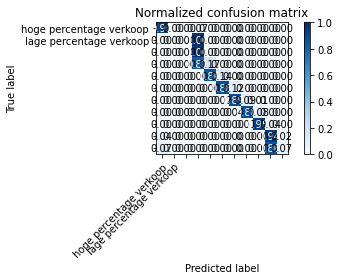

In [72]:
classes = ['hoge percentage verkoop','lage percentage verkoop']
plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)

In [76]:
# Plot non-normalized confusion matrix
class_names = y
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


TypeError: Expected sequence or array-like, got <class 'sklearn.tree._classes.DecisionTreeClassifier'>

In [68]:
from io import StringIO
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['lage gemidelde woz','hoge gemmidelde woz'] ,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())

IndexError: list index out of range

In [71]:
clf

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)